In [2]:
from deck import ChkobaDeck, Table, PlayerHand
from tqdm.auto import tqdm
import numpy as np
from collections import defaultdict

This notebook presents an in‑depth look at the traditional Tunisian card game **Chkoba**. In the following sections I describe the rules, implement a basic simulation of the game, and discuss its strategic aspects.

## Quick Introduction to Chkoba

Chkoba is a traditional Tunisian card game, usually played with a standard 32‑card deck (7 through Ace in each suit). It’s a trick‑taking game for two to four players, often enjoyed in social gatherings and cafés across Tunisia.


In [4]:
N = 2_000_000
mean_value = []
number_of_card_eaten = defaultdict(list)
for _ in tqdm(range(N)):
    d = ChkobaDeck()
    d.shuffle()
    first_player = PlayerHand()
    second_player = PlayerHand()
    table = Table()
    card = d.draw()[0]
#    print(card)
    first_player.receive_cards(card)
    first_player.receive_cards(d.draw(2))
    second_player.receive_cards(d.draw(3))
    table.add_cards(d.draw(4))
    mean_value.append(table.get_total_value())
    table.play_card(player_hand=first_player, card_or_index=card)
    if len(first_player.pile)!=0:
        number_of_card_eaten[card.val].append(len(first_player.pile)-1)
    else:
        number_of_card_eaten[card.val].append(0)
mean_number_of_card = {k: np.mean(v) for k, v in number_of_card_eaten.items()}

  0%|          | 0/2000000 [00:00<?, ?it/s]

In [5]:
import matplotlib.pyplot as plt

card_keys = np.array(sorted(number_of_card_eaten.keys()))
means = np.array([np.mean(number_of_card_eaten[k]) for k in card_keys])
stds = np.array([np.std(number_of_card_eaten[k]) for k in card_keys])

print(np.polyfit(card_keys, means, deg=2))


[0.00415443 0.07393694 0.20342462]


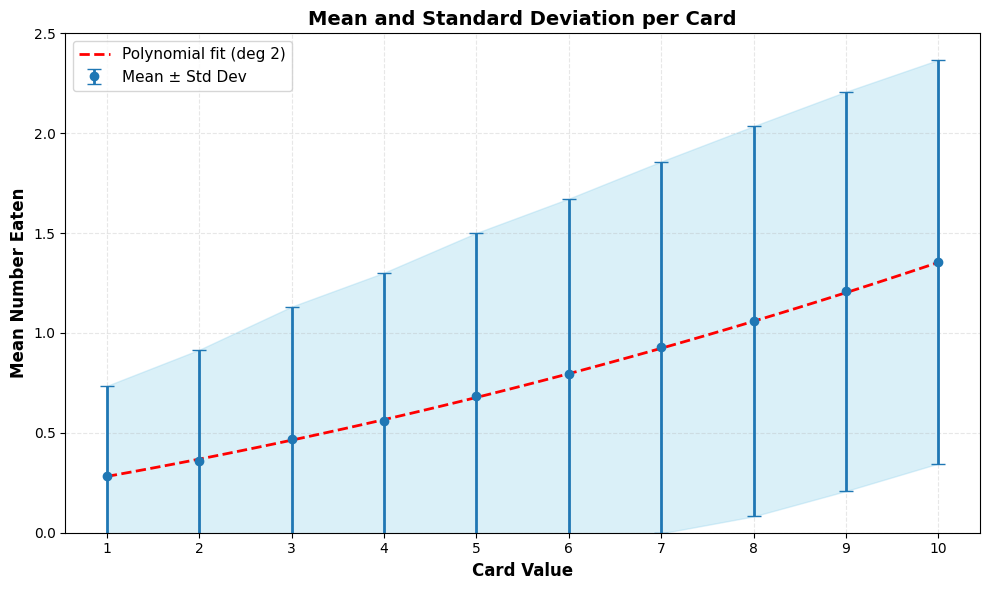

In [8]:

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.errorbar(card_keys, means, yerr=stds, fmt="o", label="Mean ± Std Dev", capsize=5, linewidth=2)

ax.fill_between(card_keys, means - stds, means + stds, color="skyblue", alpha=0.3)

x_fit = np.linspace(card_keys.min(), card_keys.max(), 100)
y_fit = 0.00404192 * x_fit**2 + 0.07458784 * x_fit + 0.20322643
ax.plot(x_fit, y_fit, "--", linewidth=2, label="Polynomial fit (deg 2)", color="red")

# Improve labels and formatting
ax.set_xlabel("Card Value", fontsize=12, fontweight="bold")
ax.set_ylabel("Mean Number Eaten", fontsize=12, fontweight="bold")
ax.set_title("Mean and Standard Deviation per Card", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3, linestyle="--")
ax.legend(fontsize=11)
ax.set_xticks(card_keys)
ax.set_ylim(0, 2.5)
plt.tight_layout()
plt.show()

In [10]:
for k, v in sorted(number_of_card_eaten.items()):
    print(f"carte {k} has eaten {np.mean(v):.2f} +/- {np.std(v):.2}")

carte 1 has eaten 0.28 +/- 0.45
carte 2 has eaten 0.36 +/- 0.55
carte 3 has eaten 0.47 +/- 0.66
carte 4 has eaten 0.56 +/- 0.74
carte 5 has eaten 0.68 +/- 0.82
carte 6 has eaten 0.79 +/- 0.88
carte 7 has eaten 0.93 +/- 0.93
carte 8 has eaten 1.06 +/- 0.98
carte 9 has eaten 1.21 +/- 1.0
carte 10 has eaten 1.36 +/- 1.0


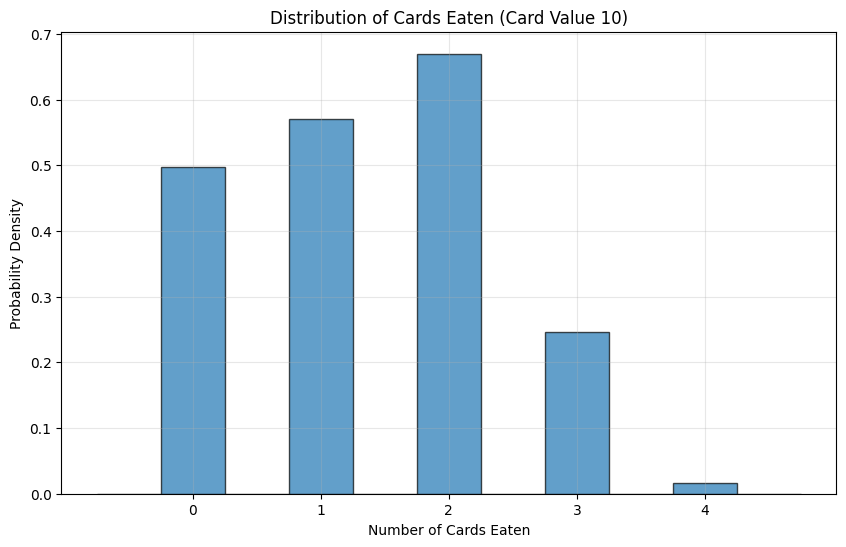

In [11]:
card_number = 10
plt.figure(figsize=(10, 6))

# Extract card data as NumPy array for vectorized operations
card_data = np.array(number_of_card_eaten[card_number])

# Create bins with width 1 centered on integers using NumPy vectorized operations
min_val = int(np.min(card_data))
max_val = int(np.max(card_data))
bin_edges = np.arange(min_val - 0.5, max_val + 1.5, 0.5)

# Plot histogram with probability density (area under histogram = 1)
plt.hist(card_data, bins=bin_edges, density=True, align='left', edgecolor='black', alpha=0.7)

# Set x-axis ticks to integers only using NumPy
integer_ticks = np.arange(min_val, max_val + 1)
plt.xticks(integer_ticks)

plt.xlabel("Number of Cards Eaten")
plt.ylabel("Probability Density")
plt.title(f"Distribution of Cards Eaten (Card Value {card_number})")
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
def plot_card_distribution(card_number: int, number_of_card_eaten, type_of_card: str | int = ""):
    """
    Plot the probability histogram of cards eaten for the given card value.
    
    Parameters
    ----------
    card_number : int
        Index/key of the card whose data you want to plot.
    number_of_card_eaten : dict or list-like
        Mapping from card numbers to iterable collections of counts.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Extract the data for the requested card and convert to a NumPy array
    card_data = np.array(number_of_card_eaten[card_number])

    # Define integer bins (width = 1, centered on integers)
    min_val, max_val = int(card_data.min()), int(card_data.max())
    bin_edges = np.arange(min_val - 0.5, max_val + 1.5, 0.5)

    # Compute probabilities per bin using weights so that the area sums to 1
    weights = np.ones_like(card_data) / len(card_data)
    plt.figure(figsize=(10, 6))
    plt.hist(
        card_data,
        bins=bin_edges,
        weights=weights,
        align='left',
        edgecolor='black',
        alpha=0.7
    )

    # Integer ticks on the x‑axis
    plt.xticks(np.arange(min_val, max_val + 1))

    plt.xlabel("Number of Cards Eaten")
    plt.ylabel("Probability")          # <-- probability (not density)
    plt.title(f"Distribution of Cards Eaten (Card {type_of_card})")
    plt.grid(True, alpha=0.3)
    plt.show()

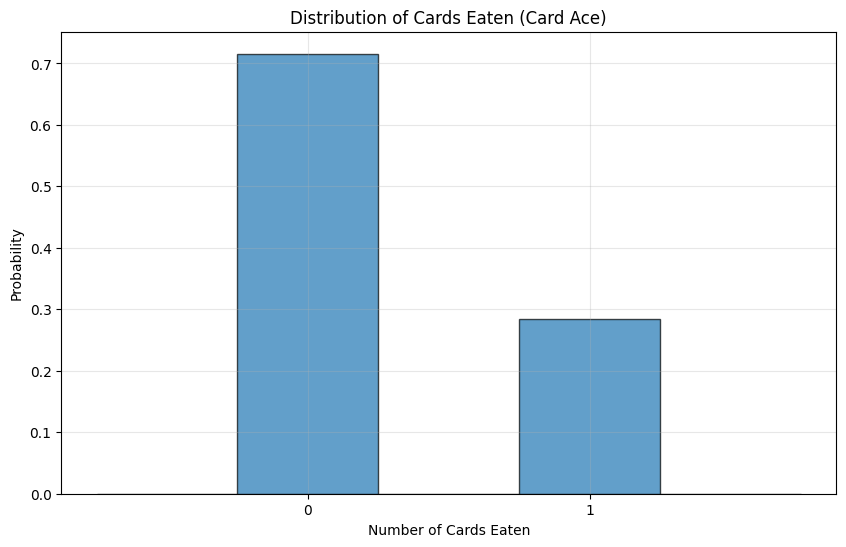

In [25]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(1, number_of_card_eaten, type_of_card = "Ace")

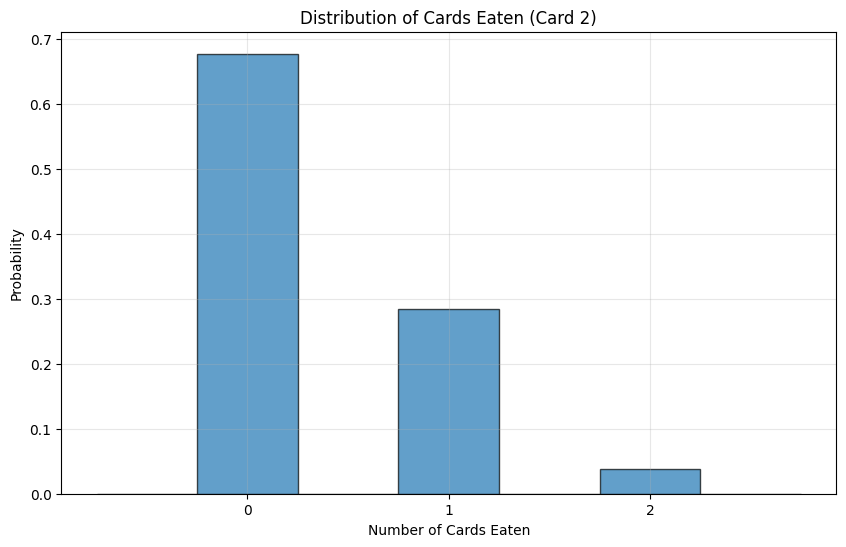

In [26]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(2, number_of_card_eaten, type_of_card = "2")

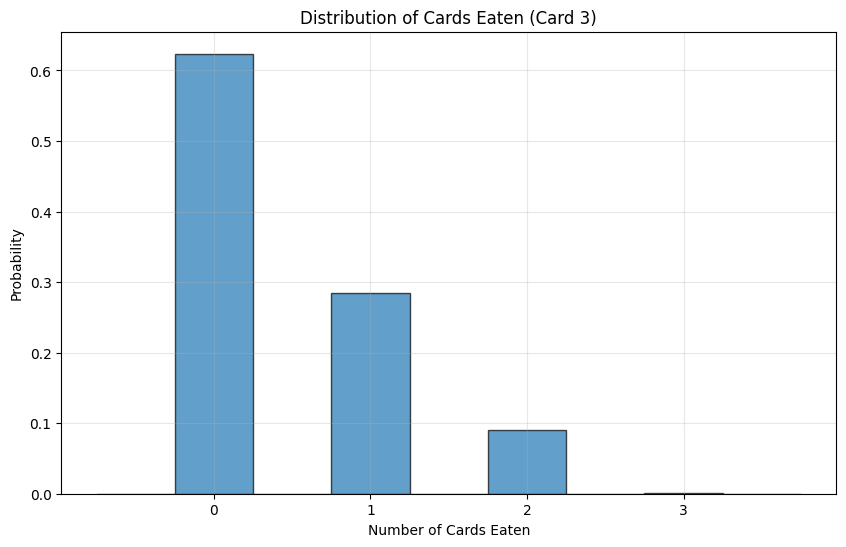

In [27]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(3, number_of_card_eaten, type_of_card = "3")

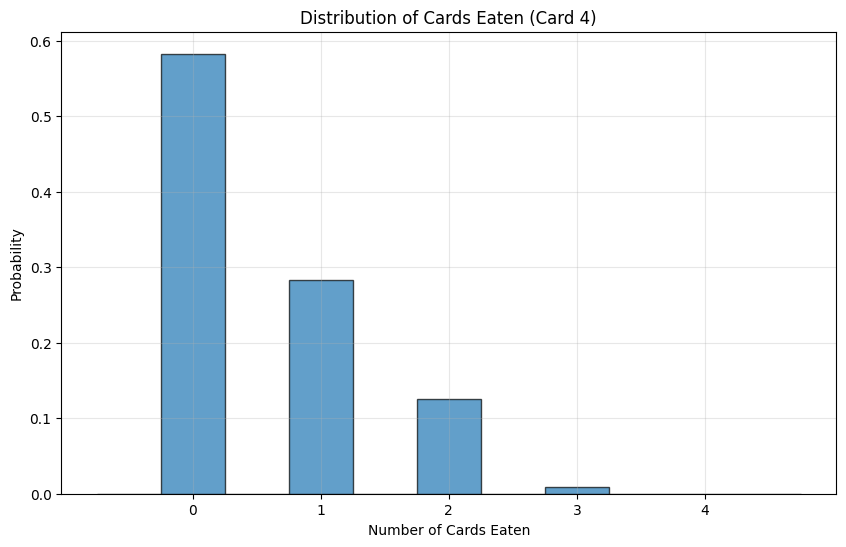

In [28]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(4, number_of_card_eaten, type_of_card = "4")

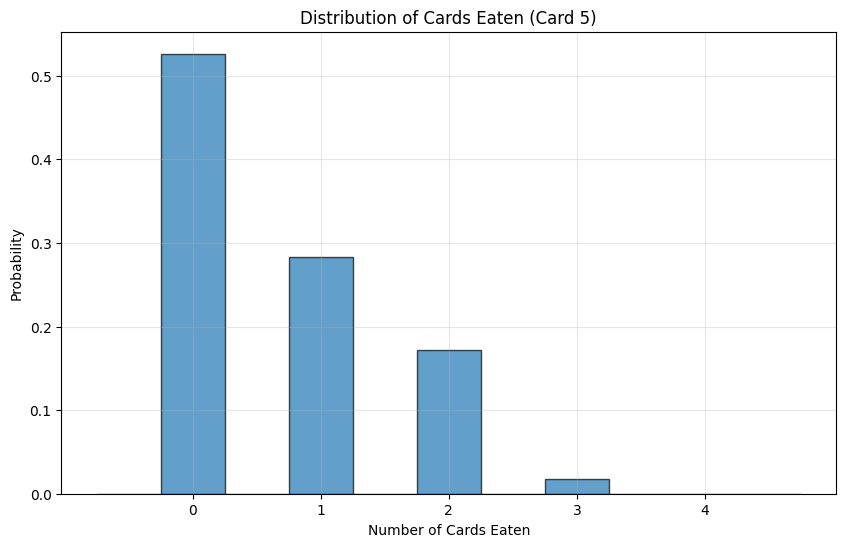

In [29]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(5, number_of_card_eaten, type_of_card = "5")

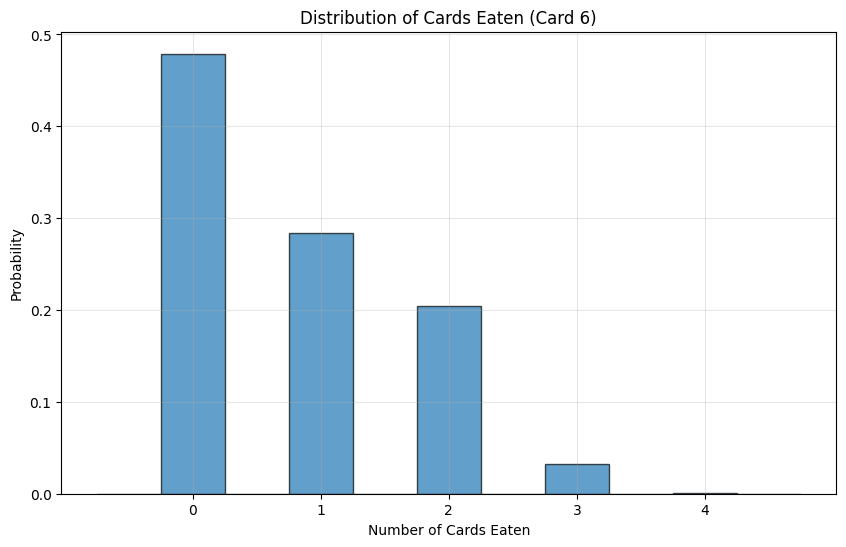

In [30]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(6, number_of_card_eaten, type_of_card = "6")

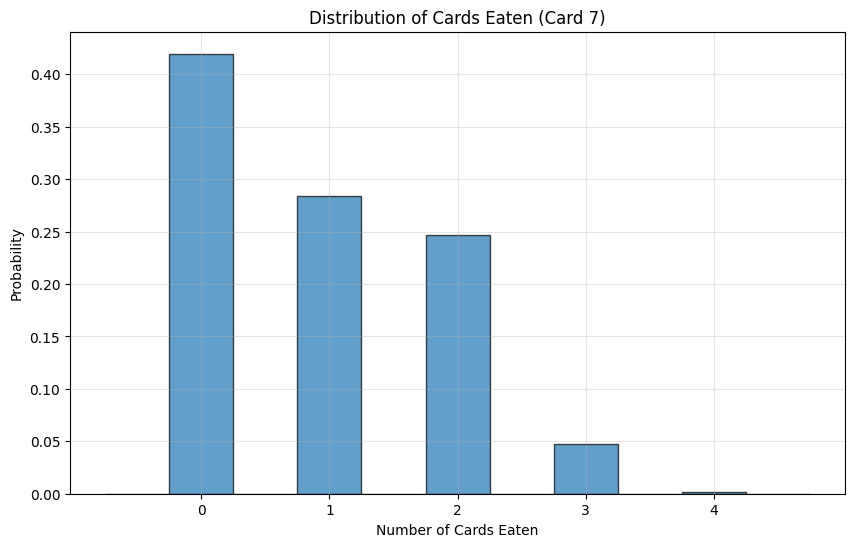

In [31]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(7, number_of_card_eaten, type_of_card = "7")

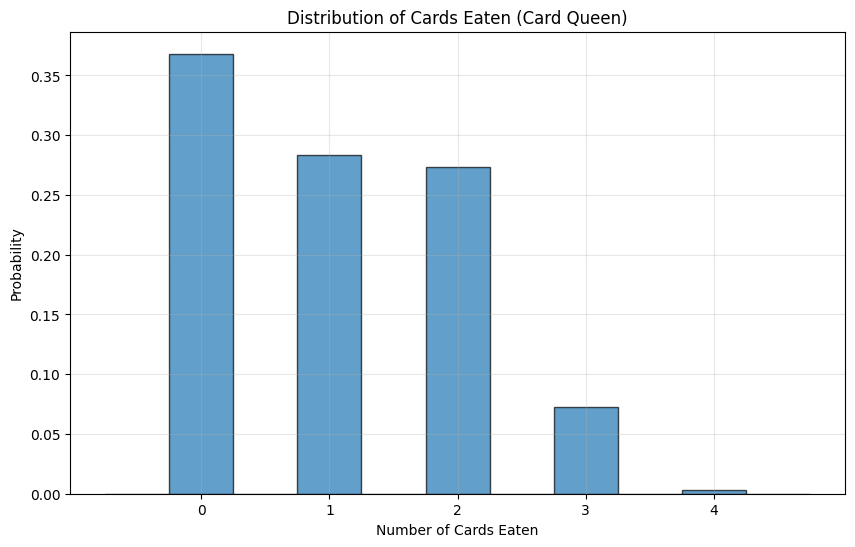

In [32]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(8, number_of_card_eaten, type_of_card = "Queen")

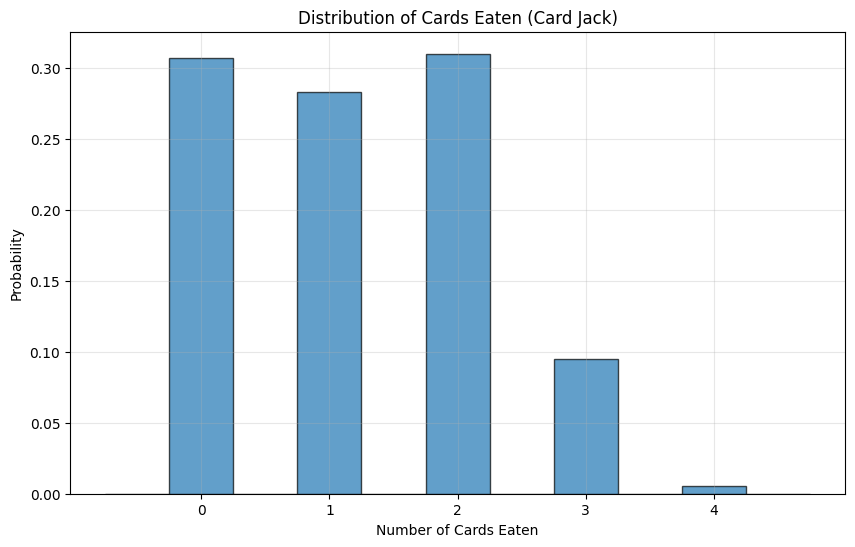

In [33]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(9, number_of_card_eaten, type_of_card = "Jack")

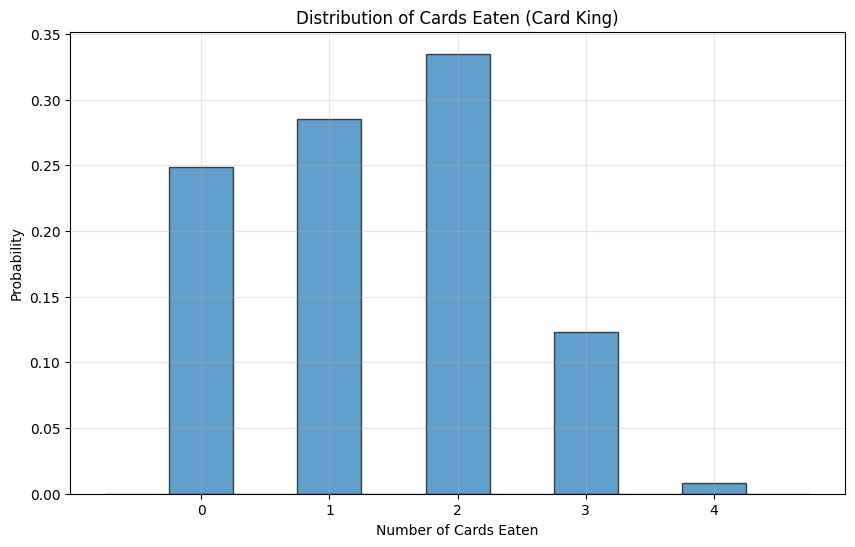

In [34]:
# Assuming `number_of_card_eaten` is already defined in your notebook
plot_card_distribution(10, number_of_card_eaten, type_of_card = "King")